# Clasificación - Random Forest

In [1]:
# Importo librerías
from sklearn.datasets import load_digits

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
# Cargo un dataset de imágenes de números 
digits = load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

X, Y
+ En cada posición tengo un píxel
+ Tonalidad de color

black
(8,8) -> matriz

red    green  blue
(8,8) (8,8)  (8,8) -> Tensor

In [3]:
X, y = digits.data, digits.target

In [4]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [5]:
len(digits["target"])

1797

In [6]:
X[0].reshape(8, 8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [7]:
idx = 2
img = X[idx,:].reshape(8, 8)
img

array([[ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.],
       [ 0.,  0.,  3., 16., 15., 14.,  0.,  0.],
       [ 0.,  0.,  8., 13.,  8., 16.,  0.,  0.],
       [ 0.,  0.,  1.,  6., 15., 11.,  0.,  0.],
       [ 0.,  1.,  8., 13., 15.,  1.,  0.,  0.],
       [ 0.,  9., 16., 16.,  5.,  0.,  0.,  0.],
       [ 0.,  3., 13., 16., 16., 11.,  5.,  0.],
       [ 0.,  0.,  0.,  3., 11., 16.,  9.,  0.]])

In [8]:
print(y[idx])

2


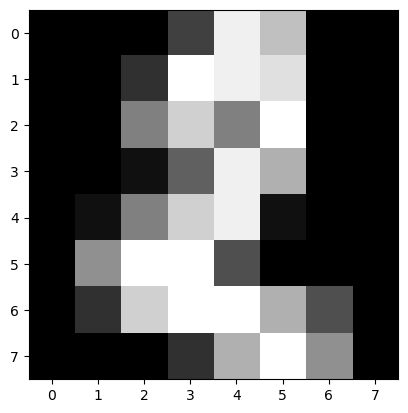

In [9]:
plt.imshow(img, cmap="gray")
plt.show()

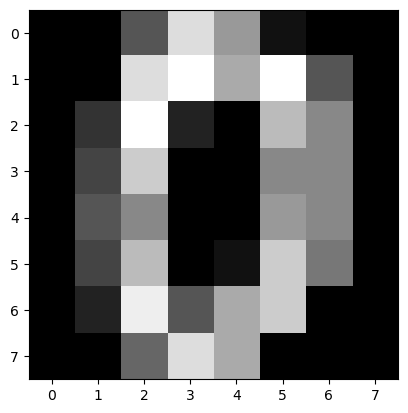

In [10]:
plt.imshow(X[0].reshape(8, 8), cmap="gray")
plt.show()

In [11]:
def show_numer(X_object, y_object, index):
    img = X_object[index,:].reshape(8, 8)
    print(y_object[index])
    plt.imshow(img, cmap="gray")
    plt.show()

0


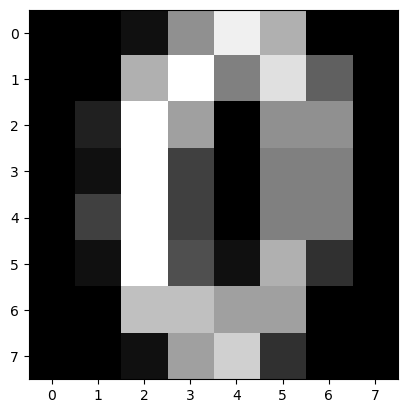

In [12]:
show_numer(X_object=X, y_object=y, index=10)

1


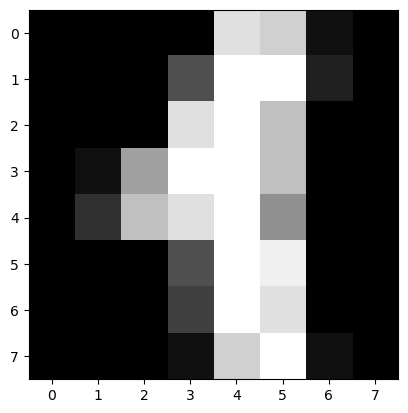

In [13]:
show_numer(X_object=X, y_object=y, index=11)

Se utiliza el método GridSearchCV, obteniéndose una métrica en test del 98 % de accuracy

In [14]:
# Separo los datos en Train + Test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [15]:
# Defino un modelo Random Forest y encuentro los 
# mejores hiperparámetros
clf = RandomForestClassifier()

In [16]:
params = {"n_estimators" : [10, 50, 100, 200],
         "max_depth"     : [5, 7, 9],
         "max_features"  : [10, "sqrt"]}

In [17]:
clf_grid = GridSearchCV(clf, params, cv=3, n_jobs=-1)
clf_grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 7, 9], 'max_features': [10, 'sqrt'],
                         'n_estimators': [10, 50, 100, 200]})

In [18]:
print(u'Mejores parámetros del modelo: {}'.format(clf_grid.best_params_))

Mejores parámetros del modelo: {'max_depth': 9, 'max_features': 'sqrt', 'n_estimators': 200}


In [19]:
print('- Accuracy de los datos de train: {} \n- Accuracy de los datos de test: {}'\
                        .format(clf_grid.score(X_train, y_train), 
                        round(clf_grid.score(X_test, y_test),2)))

- Accuracy de los datos de train: 1.0 
- Accuracy de los datos de test: 0.98


In [20]:
y_pred = clf_grid.predict(X_test)

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

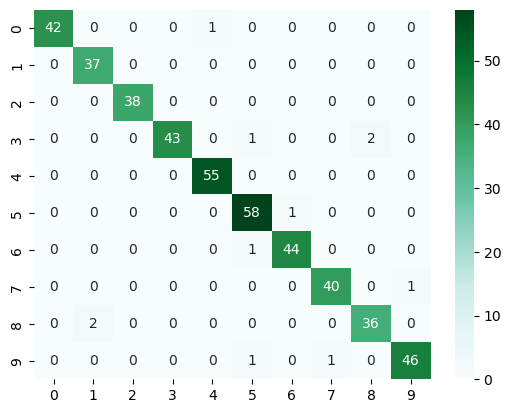

In [22]:
matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(matrix, annot = True, cmap = "BuGn")
plt.show()

In [23]:
from sklearn.metrics import f1_score, recall_score, precision_score

In [24]:
print("F1 Score - Micro -->    ", round(f1_score(y_test, y_pred, average="micro"),4))
print("F1 Score - Macro -->    ", round(f1_score(y_test, y_pred, average="macro"),4))
print("F1 Score - Weighted --> ", round(f1_score(y_test, y_pred, average="weighted"),4))

F1 Score - Micro -->     0.9756
F1 Score - Macro -->     0.9755
F1 Score - Weighted -->  0.9755


In [25]:
print("Recall Score - Micro -->    ", round(recall_score(y_test, y_pred, average="micro"),4))
print("Recall Score - Macro -->    ", round(recall_score(y_test, y_pred, average="macro"),4))
print("Recall Score - Weighted --> ", round(recall_score(y_test, y_pred, average="weighted"),4))

Recall Score - Micro -->     0.9756
Recall Score - Macro -->     0.9754
Recall Score - Weighted -->  0.9756


In [26]:
print("Accuracy Score - Micro -->    ", round(precision_score(y_test, y_pred, average="micro"),4))
print("Accuracy Score - Macro -->    ", round(precision_score(y_test, y_pred, average="macro"),4))
print("Accuracy Score - Weighted --> ", round(precision_score(y_test, y_pred, average="weighted"),4))

Accuracy Score - Micro -->     0.9756
Accuracy Score - Macro -->     0.9761
Accuracy Score - Weighted -->  0.976


Precisión Ponderada (__weighted__):
+ Esta métrica tiene en cuenta el desequilibrio de clases en el conjunto de datos. 
+ Calcula la precisión para cada clase y luego las promedia, dando más peso a las clases con más ejemplos. 
+ Es útil cuando las clases tienen tamaños desiguales y quieres evaluar el rendimiento del modelo en función de la distribución de clases en el conjunto de datos.

Precisión Macro (__macro__):
+ Esta métrica calcula la precisión promedio sin tener en cuenta el desequilibrio de clases. 
+ Calcula la precisión para cada clase por separado y luego toma el promedio aritmético de todas las precisiones de clase. 
+ Es útil para tener una idea general del rendimiento del modelo en todas las clases por igual.

Precisión Micro (__micro__): 
+ Esta métrica trata a todas las instancias individualmente y calcula la precisión global. 
+ Se suma el número de verdaderos positivos, falsos positivos y falsos negativos en todas las clases, y luego se calcula la precisión global.
+ Es útil cuando deseas evaluar el rendimiento general sin tener en cuenta las diferencias de clase.